### Opinion Review Data Set

**데이터 로딩**

In [1]:
import pandas as pd
import glob ,os

### File Upload 

##### 1. Pickle : 복잡한 자료 Upload 할때 사용. dump, upload 를 이용해 다양한 데이터 형태를 넣고 다시 Upload 가능
##### 2. glob : glob는 파일들의 목록을 뽑을 때 사용하는데, 파일의 경로명을 이용해서 Loading
##### 3. os.path : glob와 함께 os.path르 많이 사용. glob를 이용하여 파일(명) 을 하나씩 가져오고, path를 이용해 load 

In [ ]:
### 사용예제
import os.path
files = glob.glob('*')
# 얻어진 모든 파일목록을 files에 저장 
for x in files:
    if os.path.isdir(x):             # 디렉터리인가? 
        print('%s <DIR>' % x)         # 디렉터리이면 <DIR> 붙여서 출력 
        else:
            print(x)

In [2]:
path = r'C:\Users\USER\Desktop\python\OpinosisDataset1.0\topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
# 'r' 을 꼭 써줘야합니다!

### os.path.join('C:\Tmp', 'a', 'b') - "C:\Tmp\a\b"
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_ , index_col=None, header=0 ,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


In [3]:
document_df.shape

(51, 2)

In [4]:
document_df['opinion_text'][0]

"                       , and is very, very accurate .\n0    but for the most part, we find that the Garmi...\n1    This function is not accurate if you don't le...\n2    It provides immediate alternatives if the rou...\n3    I've used other GPS units, as well as GPS bui...\n4    It got me from point A to point B with 100% a...\n5    It has yet to disappoint, getting me everywhe...\n6   0 out of 5 stars Honest, accurate review, , PL...\n7    Aside from that, every destination I've throw...\n8   In closing, this is a fantastic GPS with some ...\n9    Plus, I've always heard that there are  quirk...\n10   DESTINATION TIME, , This is pretty accurate t...\n11                   But, it's always very accurate .\n12   The map is pretty accurate and the Point of i...\n13   Most of the times, this info was very accurate .\n14  I've even used it in the  pedestrian  mode, an...\n15    ONLY  is only accurate when an ad says,  Top...\n16   The most accurate review stated that these ma...\n17   The 

### Data 전처리

In [5]:
import re
# <br> html 태그는 replace 함수로 공백으로 변환
document_df['opinion_text'] = document_df['opinion_text'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
document_df['opinion_text'] = document_df['opinion_text'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [6]:
document_df['opinion_text'][0]

'                         and is very  very accurate        but for the most part  we find that the Garmi         This function is not accurate if you don t le         It provides immediate alternatives if the rou         I ve used other GPS units  as well as GPS bui         It got me from point A to point B with      a         It has yet to disappoint  getting me everywhe          out of   stars Honest  accurate review    PL         Aside from that  every destination I ve throw        In closing  this is a fantastic GPS with some          Plus  I ve always heard that there are  quirk         DESTINATION TIME    This is pretty accurate t                         But  it s always very accurate        The map is pretty accurate and the Point of i         Most of the times  this info was very accurate       I ve even used it in the  pedestrian  mode  an          ONLY  is only accurate when an ad says   Top         The most accurate review stated that these ma         The directions are hig

### 비지도학습 기반 감성 분석 소개

- Lexicon 기반으로 하는 비지도 감성 분석 : Lexicon은 일반적으로 어휘집을 의미하지만, 여기서는 주로 감성만을 분석하기 위해 지원하는 감성어휘사전, 감성사전. 긍정, 부정의 정도를의미하는 수치를 가지고 있으며 감성지수라고 한다.

- SentiWordNet을 이용한 Sentiment Analysis 
* WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

- NLP 패키지 WordNet 모듈은 방대한 영어 어휘 사전. 시맨틱 분석을 제공하는 어휘 사전. 시맨틱(semantic)은 간단히 말하면 문맥상 의미 이다. 예를들어 present라는 단어가 '선물' 의 뜻과 ' 현재'라는 뜻이 있듯이 단어가 문맥상, 환경에 따라 다르게 해석이 될 수 있다. NLP패키지는 semantic program 적으로 Interface 할 수 있는 다양한 방법을 제공. WordNet은 다양한 상황에서 같은 어휘라도 어휘의 semantic 정보를 제공하며 각 각의 품사로 구성된 개별단어를 Synset이라는 개념을 이용해 표현. 단, 성능은 그리 좋지 못하는 단점이 존재 

- SentiWordNet : NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것. 3가지 감성점수를 할당. 긍정/부정/객과성 지수. 
- VADER : 주로 소셜 미디어의 텍스트에 대한 감성분석을 제공. 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용 되는 패키지
- Pattern : 예측 성능 측면에서 가장 주목 받는 패키지. 아쉽게도 파이썬 버전 3.x에서는 호환이 되지 않는다

In [7]:
import nltk

### SentiWordNet 을 이용한 감성분석

In [8]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [10]:
document_df['preds'] = document_df['opinion_text'].apply( lambda x : swn_polarity(x) )
preds = document_df['preds'].values

In [17]:
document_df.head(5)

,filename,opinion_text,preds
0,accuracy_garmin_nuvi_255W_gps,and is very very acc...,1
1,bathroom_bestwestern_hotel_sfo,The room was not overly big but clean and...,0
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
4,battery-life_netbook_1005ha,GHz FSB cpu glossy display Cell ...,1


In [15]:
document_df.preds.value_counts()

1    42
0     9
Name: preds, dtype: int64

### VADER lexicon을 이용한 Sentiment Analysis

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
# 1개만 
senti_scores = senti_analyzer.polarity_scores(document_df['opinion_text'][0])
print(senti_scores)

{'neg': 0.016, 'neu': 0.769, 'pos': 0.215, 'compound': 0.9992}


In [21]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
document_df['vader_preds'] = document_df['opinion_text'].apply( lambda x : vader_polarity(x, 0.1) )

In [23]:
document_df.head(5)

,filename,opinion_text,preds,vader_preds
0,accuracy_garmin_nuvi_255W_gps,and is very very acc...,1,1
1,bathroom_bestwestern_hotel_sfo,The room was not overly big but clean and...,0,1
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1,1
4,battery-life_netbook_1005ha,GHz FSB cpu glossy display Cell ...,1,1


In [24]:
document_df.vader_preds.value_counts()

1    50
0     1
Name: vader_preds, dtype: int64

In [28]:
document_df.groupby(['preds', 'vader_preds'])['filename'].count()

preds  vader_preds
0      0               1
       1               8
1      1              42
Name: filename, dtype: int64

In [38]:
document_df.loc[(document_df["preds"]==0) & (document_df["vader_preds"]==0), :]

,filename,opinion_text,preds,vader_preds
47,transmission_toyota_camry_2007,After slowing down transmission has to b...,0,0


In [40]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# nltk는 
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [42]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,preds,vader_preds,cluster_label
0,accuracy_garmin_nuvi_255W_gps,and is very very acc...,1,1,0
48,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid ...,0,1,0
44,speed_windows7,Windows is quite simply faster more sta...,1,1,0
43,speed_garmin_nuvi_255W_gps,Another feature on the w is a display of...,1,1,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1,1,0
41,size_asus_netbook_1005ha,A few other things I d like to point out i...,0,1,0
36,screen_netbook_1005ha,Keep in mind that once you get in a room ...,1,1,0
35,screen_ipod_nano_8gb,As always the video screen is sharp and b...,1,1,0
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the...,1,1,0
33,satellite_garmin_nuvi_255W_gps,It s fast to acquire satel...,1,1,0


In [45]:
document_df.groupby(['cluster_label','preds'])['filename'].count()/document_df.shape[0]

cluster_label  preds
0              0        0.039216
               1        0.450980
1              0        0.058824
               1        0.254902
2              0        0.078431
               1        0.117647
Name: filename, dtype: float64

In [46]:
document_df.groupby(['cluster_label','preds'])['filename'].count()

cluster_label  preds
0              0         2
               1        23
1              0         3
               1        13
2              0         4
               1         6
Name: filename, dtype: int64

### 유사한 문서별 긍정/부정 비율 시각화

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


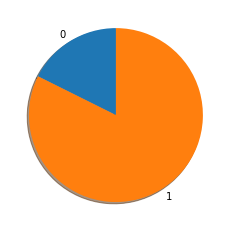

In [70]:
plt.pie(a, labels=a.index, shadow=True, startangle=90)
plt.show()

In [107]:
pandas_df = document_df.groupby(['cluster_label','preds'])['filename'].count()
pandas_df = pd.DataFrame(pandas_df)
pandas_df.reset_index(inplace = True)
#pandas_df

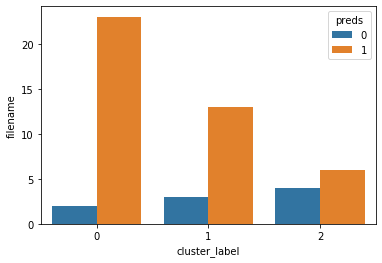

In [112]:
sns.barplot(x='cluster_label', y='filename', hue='preds', data=pandas_df)

In [109]:
pandas_df.columns

Index(['cluster_label', 'preds', 'filename'], dtype='object')

In [108]:
pandas_df

,cluster_label,preds,filename
0,0,0,2
1,0,1,23
2,1,0,3
3,1,1,13
4,2,0,4
5,2,1,6


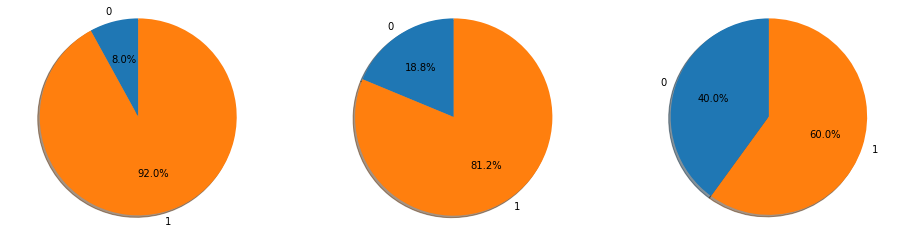

<Figure size 720x432 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16,4), ncols=3)
plt.figure(figsize=(10,6))

a = document_df.loc[document_df['cluster_label']== 0, :]
a = a.groupby(['preds'])['filename'].count()/a.shape[0]
a = pd.DataFrame(a)
ax1.pie(a['filename'], labels=a.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

b = document_df.loc[document_df['cluster_label']== 1, :]
b = b.groupby(['preds'])['filename'].count()/b.shape[0]
b = pd.DataFrame(b)
ax2.pie(b['filename'], labels=b.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

c = document_df.loc[document_df['cluster_label']== 2, :]
c = c.groupby(['preds'])['filename'].count()/c.shape[0]
c = pd.DataFrame(c)
ax3.pie(c['filename'], labels=c.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

for 문을 돌려서 그릴 수 있을까 ..

해석 : 
- '0' 포터블 전자기기 - 전체 리뷰 중 긍정적인 반응이 많다
- '1' 호텔 - 전자기기 보다는 조금 더 부정적인 반응을 보이고 있다
- '2' 자동차 - 부정적이 반응이 다른 리뷰에 비해 많다 